# Assignment for Clustering
### Note :Dataset and Notebook in the same working direactory

In [1]:
# Importing Required Library
import pandas as pd
import numpy as np

#Importing Visualization Library
import matplotlib.pyplot as plt
import seaborn as sns

#Importing Unsupervised learning library
from scipy.cluster.hierarchy import cut_tree
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage
from sklearn.cluster import KMeans

#Importing matric for optimize k value
from sklearn.metrics import silhouette_score

#Scaling
from sklearn.preprocessing import StandardScaler

#Importing warnings
import warnings
warnings.filterwarnings("ignore")

`Objective: `

categorise the countries using some socio-economic and health factors that determine the overall development of the country.
Then you need to suggest the countries which the CEO needs to focus on the most.

In [2]:
#Step 1: Reading and Understand Data
country=pd.read_csv("Country-data.csv")
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
# checking Data Type for Variable
country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 12.5+ KB


In [4]:
country.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [5]:
#check Null value
country.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

Here we see no null value present in data but some attribute are scaled in pertage so we convert to associated format.

In [6]:
#Sanity check
country.country.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cyprus', 'Czech Republic', 'Denmark',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Fiji', 'Finland',
       'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana',
       'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau',
       'Guyana', 'Haiti', 'Hungary', 'Iceland', 'India', 'Indonesia',
       'Iran

In [7]:
country_cnt=country.country.value_counts()
country_cnt.reset_index()
country_cnt[country_cnt>1]
# Here all countries are unique..

Series([], Name: country, dtype: int64)

In [8]:
# Changing Percentage Value into associated value
country["exports"]=country["exports"]*country["gdpp"]/100
country["health"]=country["health"]*country["gdpp"]/100
country["imports"]=country["imports"]*country["gdpp"]/100

In [9]:
#Rechecking data description
country.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [10]:
# Checking Data type and null values in data
country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 12.5+ KB


In [11]:
#Step 2:Clean Data
## 1. Outlier Detection
### !)for handling outlier we use capping approach
# Because a oulier be affecting during clustering.........

In [12]:
# for checking oulier use describe method
country.describe(percentiles=[0.1,0.25,0.50,0.75,0.95])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
10%,4.200000,110.224800,36.502560,211.005600,1524.000000,0.587800,57.820000,1.452000,593.800000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
95%,116.000000,31385.100000,4966.701000,24241.560000,48290.000000,20.870000,81.400000,5.861000,48610.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [13]:
# Univariate Analysis
# Here we use function to reduce redundant work......
def box(var):
    plt.figure(figsize=[15,3])
    sns.boxplot(var,data=country)
    plt.title("Distribution of "+"%s"%var,fontsize=15)
def cap_upper(var):
    Q1=int(country[var].quantile([0.25]))
    Q3=int(country[var].quantile([0.75]))
    IQR=Q3-Q1
    hi=Q3+1.5*IQR
    country[var]=country[var].apply(lambda x:hi if x>hi else x)
def cap_lower(var):
    # Capping a lower outlier
    Q1=int(country[var].quantile([0.25]))
    Q3=int(country[var].quantile([0.75]))
    IQR=Q3-Q1
    Lo=Q1-1.5*IQR
    country[var]=country[var].apply(lambda x:Lo if x<Lo else x)

### Univariate Analysis: Numerical Data

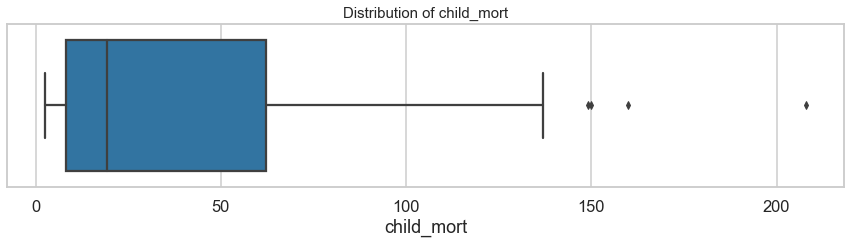

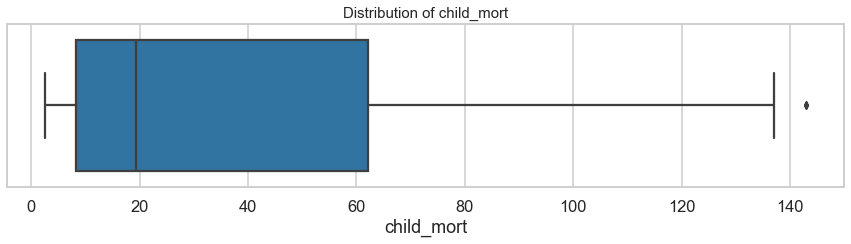

In [14]:
#Box Plot
sns.set_style('whitegrid')
sns.set_context('talk')
box("child_mort")
# here instead of dropping we capped to higher hing of box plot so those two oulier are group in high child_mort
cap_upper("child_mort")
box("child_mort")

**`Inference`**
- Also most of countries has child mortality rate count  in between 20 to 62 Death of children under 5 years of age per 1000 live births.

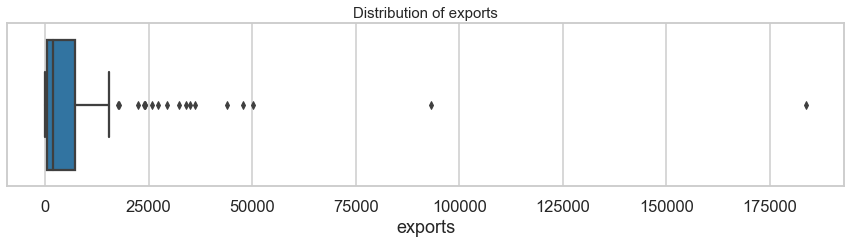

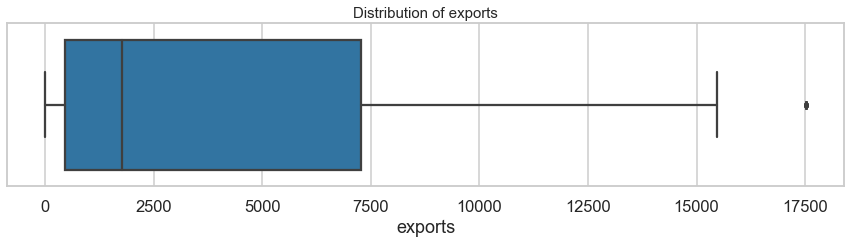

In [15]:
#plotting box plot for export varibale
box("exports")
cap_upper("exports")
box("exports")

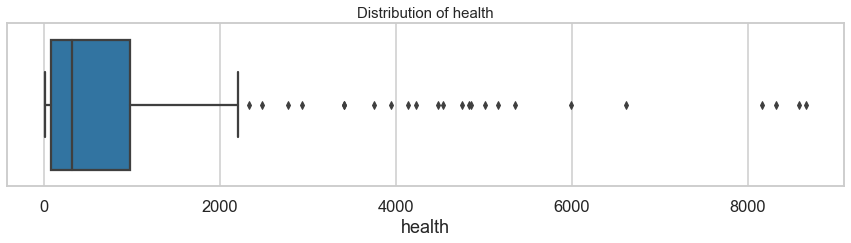

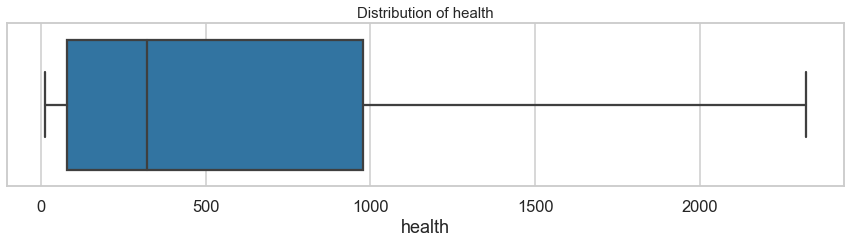

In [16]:
#plotting box plot for health col
box("health")
cap_upper("health")
box("health")

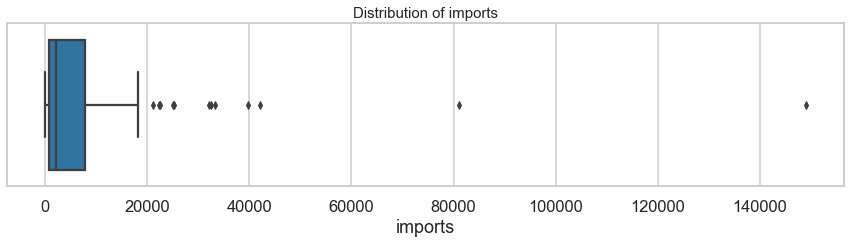

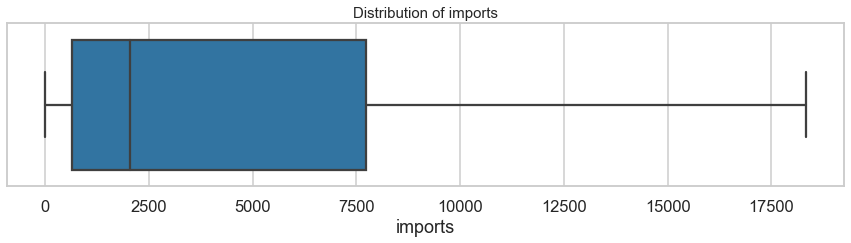

In [17]:
#plotting box plot for import variable
box("imports")
# capping oulier instead of dropping
cap_upper("imports")
box("imports")

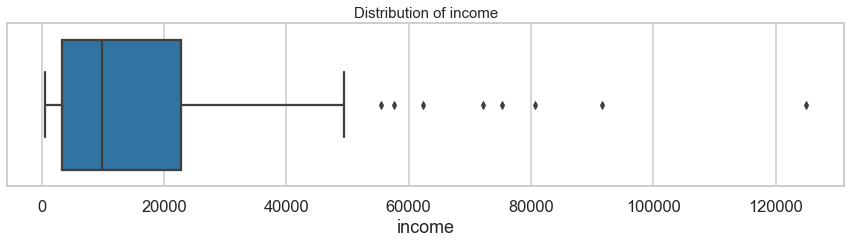

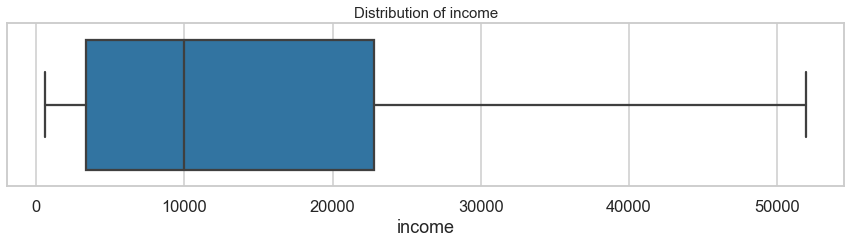

In [18]:
#box plot for income variable
box("income")
#capping the data instead of dropping
cap_upper("income")
box("income")

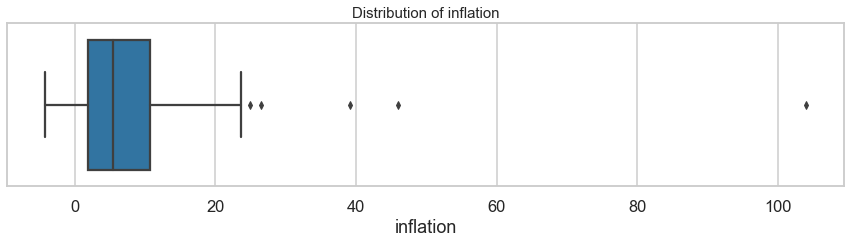

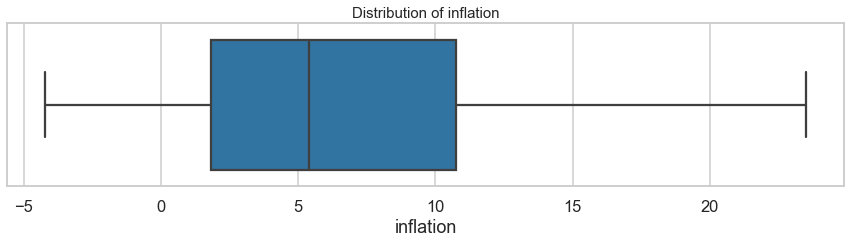

In [19]:
#plotting box plot for inflaction variable
box("inflation")
#capping the outlier instead of dropping
cap_upper("inflation")
box("inflation")

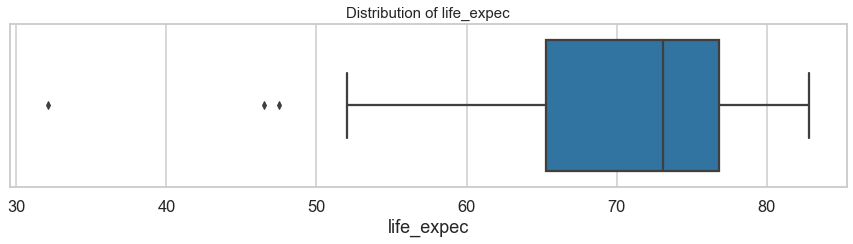

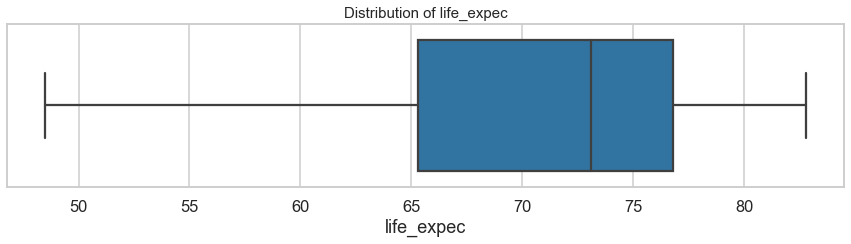

In [20]:
#plotting box plot
box("life_expec")
cap_lower("life_expec")
box("life_expec")

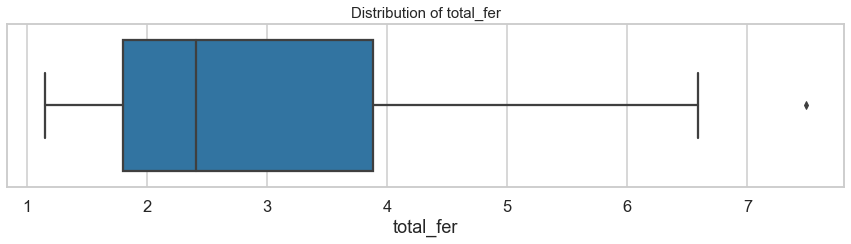

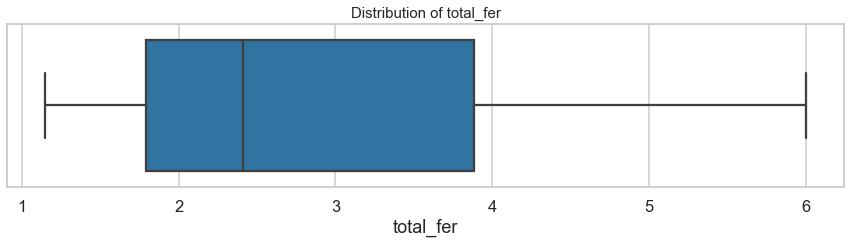

In [21]:
# plotting box plot
box("total_fer")
cap_upper("total_fer")
box("total_fer")

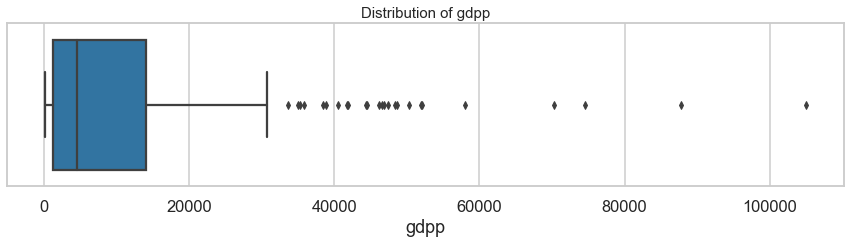

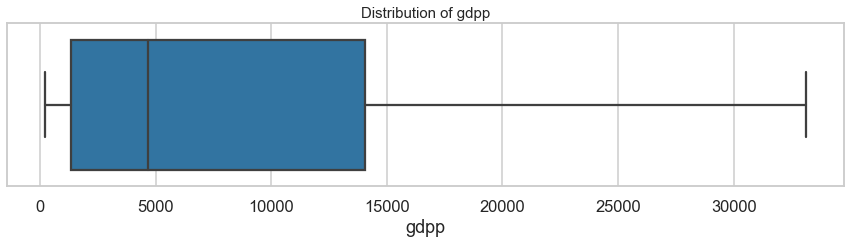

In [22]:
# plotting box plot
box("gdpp")
cap_upper("gdpp")
box("gdpp")

### Numeric-Numeric anlaysis

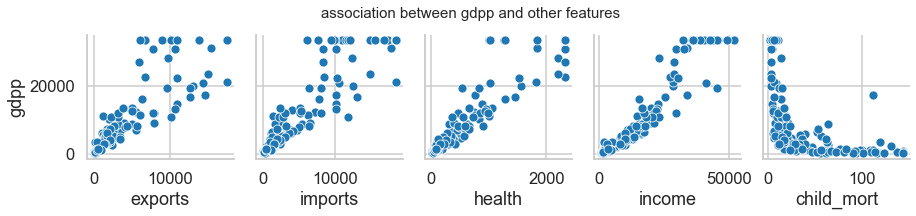

In [23]:
g=sns.pairplot(x_vars=["exports","imports","health","income","child_mort"],y_vars="gdpp",data=country);
g.fig.suptitle("association between gdpp and other features",fontsize=15,y=1.12);

**`inference :`**
- In scatter plot we see all feature with respect to gdpp are monotonic in nature(i.e It will increasing or descresing).
- In export and import if it below 5000 then gdp be increase upto 10000 .
- if export and import are high(inceasing ) then gdp also increasing.
- Here we see another view like spending more on health so gdp per capita also increasing as same for net income.
- In child_mort Vs Gdp we observed as much as less count of child moratality it be inceasing Gdp for countries .

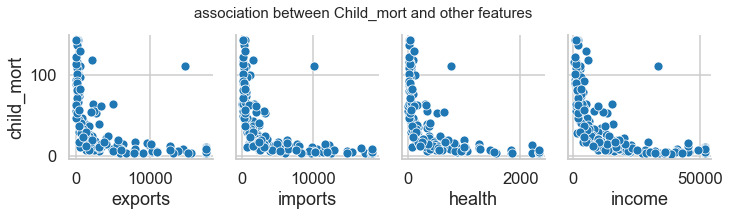

In [24]:
#plotting pairplot
g=sns.pairplot(x_vars=["exports","imports","health","income"],y_vars="child_mort",data=country);
g.fig.suptitle("association between Child_mort and other features",fontsize=15,y=1.12);

**`inference`**:
- Here we observed specific trends between child_mort count  and other feature(i.e. variable)
- We only see as perspective of medical domain problem when if countries spend less money for health so count child_mortality be more.because of less medicine,beds,ventilators etc,so country need to carefull.
- We see if person net income is less then count for child_mort be increasing . For NGO need to relese some fund to people for medical.

### Multivariate analysis:

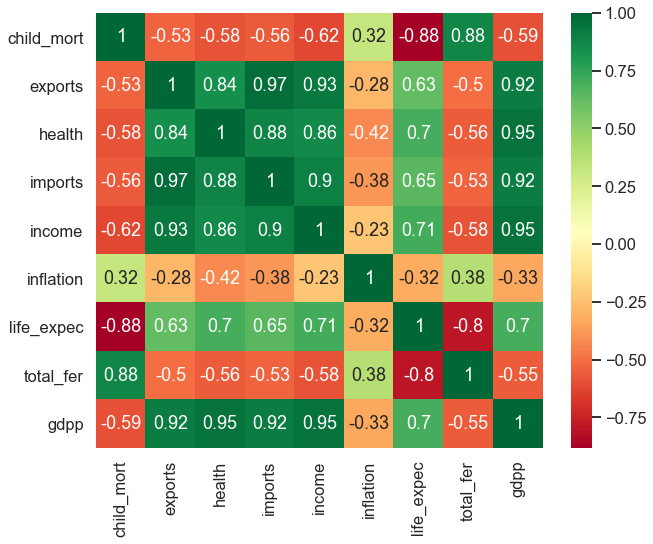

In [25]:
plt.figure(figsize=[10,8])
#Plotting Heatmap
sns.heatmap(country.corr(),cmap="RdYlGn",annot=True);

**`inference`**:
- Here we see strong (positve or negetive) corrleationship in attributes.
- we listing strong correlation are...
    - child_mort-life_expec
    - child_mort-total_fer
    - exports-gdpp
    - health-gdpp
    - import-gdpp
    - income-gdpp
    - export-income,import
    - health-import
- for clustring we required some attributes have explain a data more so we use PCA(Dimentionality Reduction Method).

# Step 5:Modeling
## Choosing optimal k value by silhoutte score

In [26]:
sample=country[["child_mort","income","gdpp"]]
# Standard Scalling
scale2=StandardScaler()
# learn and apply to data
sample_scale=scale2.fit_transform(sample)

In [27]:
# View Data
sample_scale

array([[ 1.36943013e+00, -9.43935746e-01, -8.46341070e-01],
       [-5.50424287e-01, -3.95180945e-01, -5.40827457e-01],
       [-2.71315016e-01, -1.99291311e-01, -5.08868159e-01],
       [ 2.12067752e+00, -6.60984052e-01, -5.89198286e-01],
       [-7.14759652e-01,  2.09636546e-01,  1.59685804e-01],
       [-6.05202742e-01,  1.83254103e-01, -4.42951008e-03],
       [-5.11296819e-01, -6.08219167e-01, -6.15974995e-01],
       [-8.58227033e-01,  1.68045771e+00,  1.96754555e+00],
       [-8.71269523e-01,  1.79917870e+00,  1.96754555e+00],
       [ 3.90962283e-02,  5.17261748e-03, -3.89668615e-01],
       [-6.23462227e-01,  4.60269748e-01,  1.52443420e+00],
       [-7.59104115e-01,  1.66067087e+00,  8.93885892e-01],
       [ 3.05163009e-01, -8.89192178e-01, -8.28633891e-01],
       [-6.13028235e-01, -4.09966566e-02,  4.87916431e-01],
       [-8.39967549e-01,  1.83638387e-02, -3.73257084e-01],
       [-8.66052527e-01,  1.66067087e+00,  1.96754555e+00],
       [-4.93037334e-01, -5.30390962e-01

In [28]:
#creating dataframe for scaled data
final_sample=pd.DataFrame(sample_scale,columns=["child_mort","income","gdpp"])
final_sample         #shown data

,child_mort,income,gdpp
0,1.369430,-0.943936,-0.846341
1,-0.550424,-0.395181,-0.540827
2,-0.271315,-0.199291,-0.508868
3,2.120678,-0.660984,-0.589198
4,-0.714760,0.209637,0.159686
...,...,...,...
162,-0.221754,-0.855555,-0.637569
163,-0.537382,0.038151,0.271975
164,-0.375655,-0.753982,-0.780954
165,0.485149,-0.754642,-0.780954


In [29]:
#Testing data is suitable for clustering or not..By Hopkin test
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H


hopkins(final_sample)

0.9325059029884547

silhoutte score for cluster  2 is 0.58580175088533
silhoutte score for cluster  3 is 0.5733827892876014
silhoutte score for cluster  4 is 0.4877915573730646
silhoutte score for cluster  5 is 0.4846027452405808
silhoutte score for cluster  6 is 0.4676579015075167
silhoutte score for cluster  7 is 0.47012884943907485
silhoutte score for cluster  8 is 0.4616489021690174


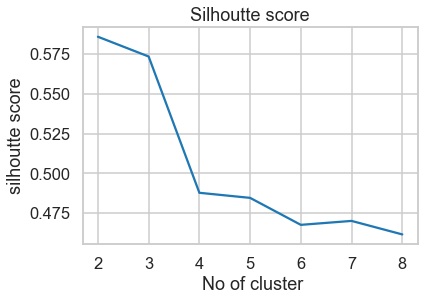

In [30]:
# silhoutte score
output=[]
range_of_cluster=[2,3,4,5,6,7,8]
for i in range_of_cluster:
    kmean=KMeans(n_clusters=i,max_iter=50)
    kmean.fit(final_sample)
    labels=kmean.labels_
    output.append(silhouette_score(final_sample,labels))
    plt.xticks([0,1,2,3,4,5,6],[2,3,4,5,6,7,8])
    print("silhoutte score for cluster ",i,"is",silhouette_score(final_sample,labels))
    plt.title("Silhoutte score")
    plt.xlabel(" No of cluster")
    plt.ylabel("silhoutte score")
    
plt.plot(output);

sum of explained error score for 2 cluster is 195.72348046295812
sum of explained error score for 3 cluster is 82.69381153081008
sum of explained error score for 4 cluster is 59.5308532312514
sum of explained error score for 5 cluster is 44.520725813934604
sum of explained error score for 6 cluster is 35.54146863828244
sum of explained error score for 7 cluster is 30.240715124528382
sum of explained error score for 8 cluster is 24.583288753147425


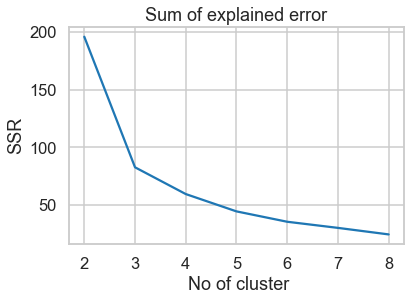

In [31]:
# checking by elbow method
output=[]
range_of_cluster=[2,3,4,5,6,7,8]
for i in range_of_cluster:
    kmean=KMeans(n_clusters=i,max_iter=50)
    kmean.fit(final_sample)
    labels=kmean.labels_
    output.append(kmean.inertia_)
    plt.xticks([0,1,2,3,4,5,6],[2,3,4,5,6,7,8])
    print("sum of explained error score for",i,"cluster is",kmean.inertia_)
    plt.title("Sum of explained error")
    plt.xlabel(" No of cluster")
    plt.ylabel("SSR")
    
plt.plot(output);

- Here we want less sum of squared error or high silhoutte score.
- We see cluster 3 has high silhoutte score upto 0.57 and SSE is also high upto 82 .
- so we use cluster 4 has n_clusters for k-means which has high compared to 5,6,7 and also lower than cluster 3.

In [32]:
# KMeans Clustering 
kmean=KMeans(n_clusters=4,max_iter=500,random_state=42)
#learning a parameters
kmean.fit(final_sample)

KMeans(max_iter=500, n_clusters=4, random_state=42)

In [33]:
#checking labels 
print("Length of labels",len(kmean.labels_))
kmean.labels_

Length of labels 167


array([1, 3, 3, 1, 0, 0, 3, 2, 2, 3, 2, 2, 3, 0, 0, 2, 3, 1, 3, 3, 0, 3,
       0, 2, 0, 1, 1, 3, 1, 2, 3, 1, 1, 0, 3, 0, 1, 1, 3, 0, 1, 0, 2, 0,
       2, 3, 3, 3, 3, 1, 3, 0, 3, 2, 2, 3, 1, 3, 2, 1, 2, 0, 3, 1, 1, 3,
       1, 0, 2, 3, 3, 0, 3, 2, 2, 2, 3, 2, 3, 0, 3, 3, 2, 3, 1, 0, 0, 1,
       1, 0, 0, 2, 0, 3, 1, 0, 0, 1, 2, 1, 0, 3, 3, 3, 0, 3, 1, 3, 3, 3,
       2, 2, 1, 1, 2, 2, 1, 0, 3, 3, 3, 0, 2, 2, 0, 0, 3, 3, 2, 3, 0, 0,
       1, 2, 0, 2, 3, 3, 2, 2, 3, 3, 1, 0, 2, 2, 3, 1, 0, 3, 1, 3, 3, 0,
       3, 1, 3, 2, 2, 2, 0, 3, 3, 0, 3, 3, 1])

In [34]:
#ceate final cluster with country data
final=country[["country","child_mort","income","gdpp"]]
final["Cluster_id"]=kmean.labels_

In [35]:
# final data with cluster ids
final.head()

,country,child_mort,income,gdpp,Cluster_id
0,Afghanistan,90.2,1610.0,553.0,1
1,Albania,16.6,9930.0,4090.0,3
2,Algeria,27.3,12900.0,4460.0,3
3,Angola,119.0,5900.0,3530.0,1
4,Antigua and Barbuda,10.3,19100.0,12200.0,0


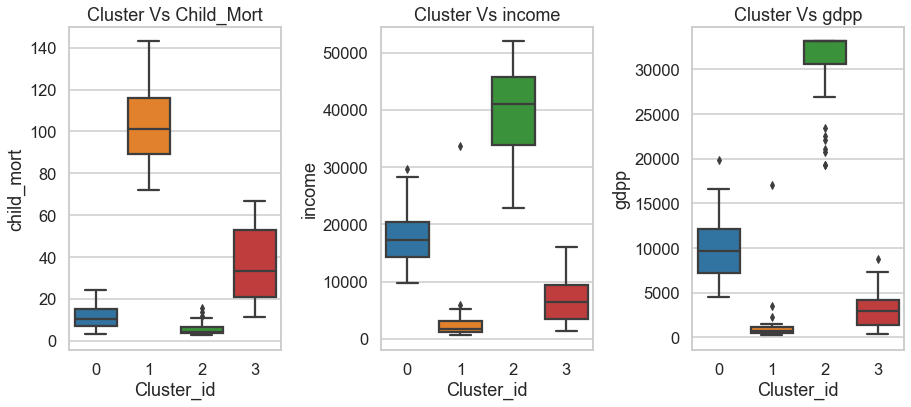

In [36]:
# Visualizing cluster
plt.figure(figsize=[13,6])
plt.subplot(1,3,1)
plt.title("Cluster Vs Child_Mort")
sns.boxplot(x="Cluster_id",y="child_mort",data=final);
plt.subplot(1,3,2)
plt.title("Cluster Vs income")
sns.boxplot(x="Cluster_id",y="income",data=final);
plt.subplot(1,3,3)
plt.title("Cluster Vs gdpp")
sns.boxplot(x="Cluster_id",y="gdpp",data=final);
plt.tight_layout()

**`inference`**:
- cluster 0:
    - are **Moderate rich** countries where low count of child_mort and those are are also economical well other than cluster 1 and 3.
- cluster 1:
    - These group consiste country are in **poverty** with high count of child_mort,low income and low gdpp rate.
- cluster 2:
    - are **Very Rich** country which have low in poverty with economically good than other 3 cluster.
- cluster 3:
    - Those group are **Moderate low** with 2nd high child_mort count,but economical well than cluster 1.

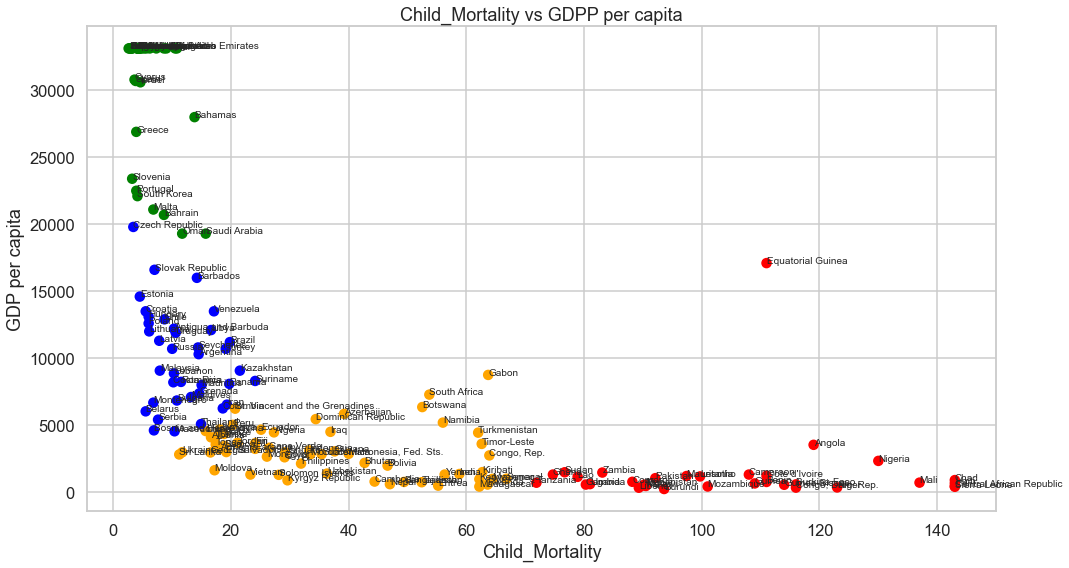

In [37]:
#Visualising the clusters formed with origibal varaibles(on X-Y axes)

%matplotlib inline                  
fig = plt.figure(figsize = (15,8))   # setting the figure size

# Plotting a scatter plot

plt.scatter(final['child_mort'], final['gdpp'],
            c = final.Cluster_id.map({0:'blue',1:'red',2:'green',3:'orange'}))

# labeling different cluster points with country names 

for i, txt in enumerate(final.country):
    plt.annotate(txt, (final.child_mort[i],final.gdpp[i]))

# labeling the axes and title

plt.title('Child_Mortality vs GDPP per capita')
plt.xlabel('Child_Mortality')
plt.ylabel('GDP per capita')

plt.tight_layout()  # changing the layout

plt.show()           # Showing the plot

In [38]:
final[final["Cluster_id"]==1].sort_values(by=["child_mort"],ascending=False).loc[:,["country","child_mort"]].head().values.tolist()
# Those country need more help according child_mort count.

[['Haiti', 143.0],
 ['Sierra Leone', 143.0],
 ['Central African Republic', 143.0],
 ['Chad', 143.0],
 ['Mali', 137.0]]

In [39]:
final[final["Cluster_id"]==1].sort_values(by=["income"],ascending=True).loc[:,["country","income"]].head().values.tolist()
# Those country need more help according income count.

[['Congo, Dem. Rep.', 609.0],
 ['Liberia', 700.0],
 ['Burundi', 764.0],
 ['Niger', 814.0],
 ['Central African Republic', 888.0]]

In [40]:
final[final["Cluster_id"]==1].sort_values(by=["gdpp"],ascending=True).loc[:,["country","gdpp"]].head().values.tolist()
# Those country need more help according income count.

[['Burundi', 231.0],
 ['Liberia', 327.0],
 ['Congo, Dem. Rep.', 334.0],
 ['Niger', 348.0],
 ['Sierra Leone', 399.0]]

# Clustering based on hireachical.

In [41]:
# where we use use same scaled data which segmented
final_sample

,child_mort,income,gdpp
0,1.369430,-0.943936,-0.846341
1,-0.550424,-0.395181,-0.540827
2,-0.271315,-0.199291,-0.508868
3,2.120678,-0.660984,-0.589198
4,-0.714760,0.209637,0.159686
...,...,...,...
162,-0.221754,-0.855555,-0.637569
163,-0.537382,0.038151,0.271975
164,-0.375655,-0.753982,-0.780954
165,0.485149,-0.754642,-0.780954


- **here we dont required to check which no of k is suitable for cluster this is main advantage over kmean clustering of hireachical one**

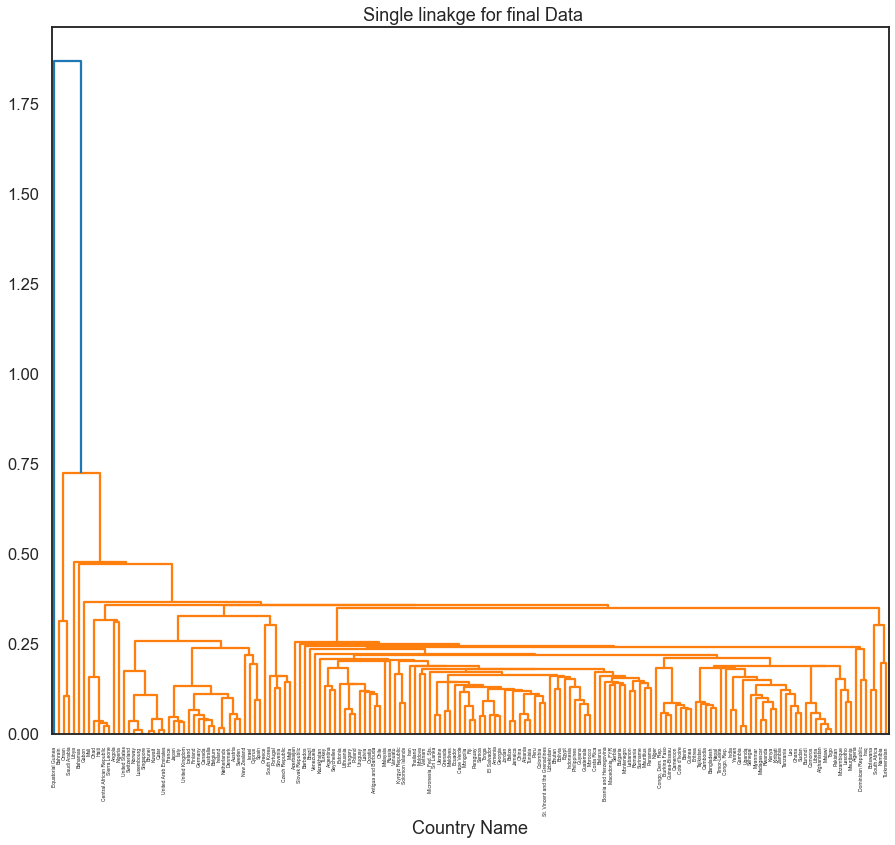

In [42]:
# single linkage
mergings=linkage(final_sample,method="single",metric="euclidean")
plt.figure(figsize=(15,13))
sns.set_style('white') 
dendrogram(mergings,labels=list(final.country))
plt.title(" Single linakge for final Data")
plt.xlabel("Country Name")
plt.show()

- As we look graph are skwed to right are 2,3,4 arenot to be seen well for clustring. As per Business problem we want most poor country .
- As most we create 3 or 4 cluster but in dendrogram we see imbalanced nature

In [43]:
# checking how clustering is done
pd.DataFrame({"cls":cut_tree(mergings,n_clusters=5).reshape(-1,)}).loc[:,'cls'].value_counts()

0    161
2      3
4      1
3      1
1      1
Name: cls, dtype: int64

- **So go to complete llinakge to check how cluster formed** 

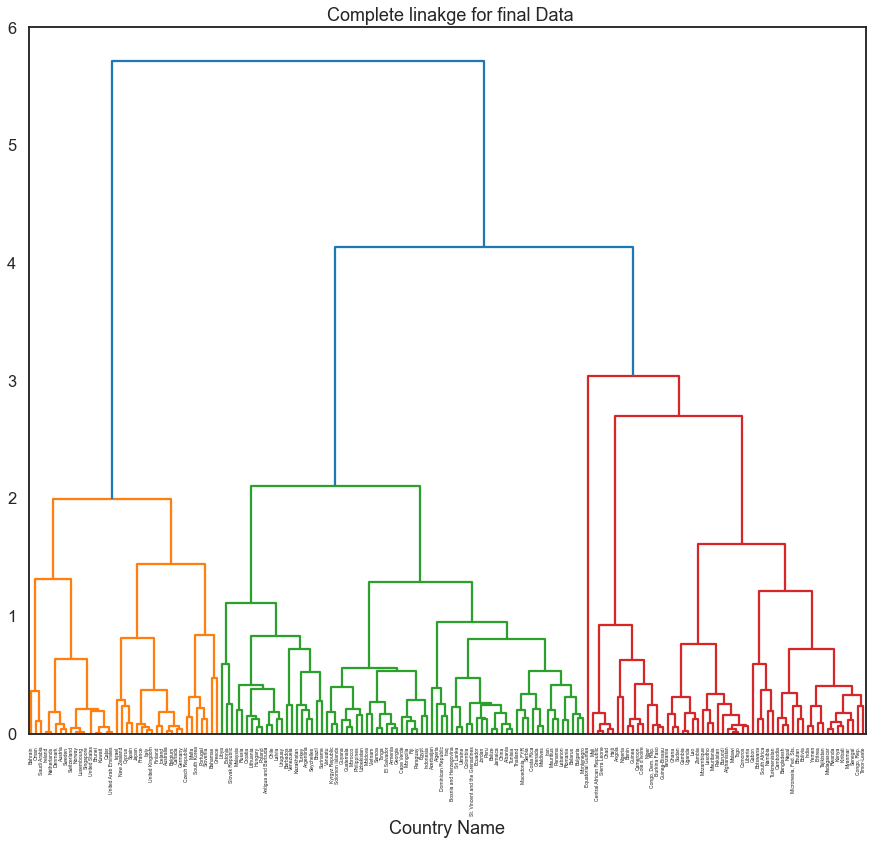

In [44]:
# complete linkage
%matplotlib inline
mergings2=linkage(final_sample,method="complete",metric="euclidean")
plt.figure(figsize=(15,13))
dendrogram(mergings2,labels=list(final.country))
plt.title(" Complete linakge for final Data")
plt.xlabel("Country Name")
plt.show()

- **Here we see well formed hierachical tree ,and we can cut the tree in 3 cluster .....**

In [45]:
pd.DataFrame({"cls":cut_tree(mergings2,n_clusters=3).reshape(-1,)}).loc[:,'cls'].value_counts()

1    73
0    56
2    38
Name: cls, dtype: int64

In [46]:
# here all group are see be balanced now confirm it via box plot.
final["Cls_comp_3"]=cut_tree(mergings2,n_clusters=3).reshape(-1,)
final.head()

,country,child_mort,income,gdpp,Cluster_id,Cls_comp_3
0,Afghanistan,90.2,1610.0,553.0,1,0
1,Albania,16.6,9930.0,4090.0,3,1
2,Algeria,27.3,12900.0,4460.0,3,1
3,Angola,119.0,5900.0,3530.0,1,0
4,Antigua and Barbuda,10.3,19100.0,12200.0,0,1


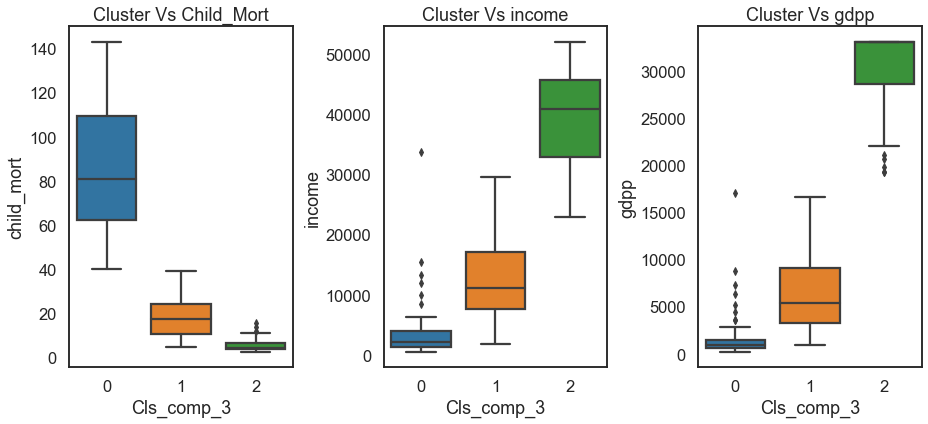

In [47]:
# Visualizing cluster
plt.figure(figsize=[13,6])
plt.subplot(1,3,1)
plt.title("Cluster Vs Child_Mort")
sns.boxplot(x="Cls_comp_3",y="child_mort",data=final);
plt.subplot(1,3,2)
plt.title("Cluster Vs income")
sns.boxplot(x="Cls_comp_3",y="income",data=final);
plt.subplot(1,3,3)
plt.title("Cluster Vs gdpp")
sns.boxplot(x="Cls_comp_3",y="gdpp",data=final);
plt.tight_layout()

**`inference`**:
- Total inference from above three box plot, where our main objective is finding poor countrires list to know CEO of NGO,
- As per buisness problem we want countries that have more child_mort count, low income ,low gdpp thats it we got such cluster is 0 .
- cluster 0:
    - group of countries who's need help from NGO
- cluster 1:
    - group of countries which have less count of child_mort and high in social economic than cluster 0:
- cluster 2:
    - This cluster don't required help those wel with economical and poverty.

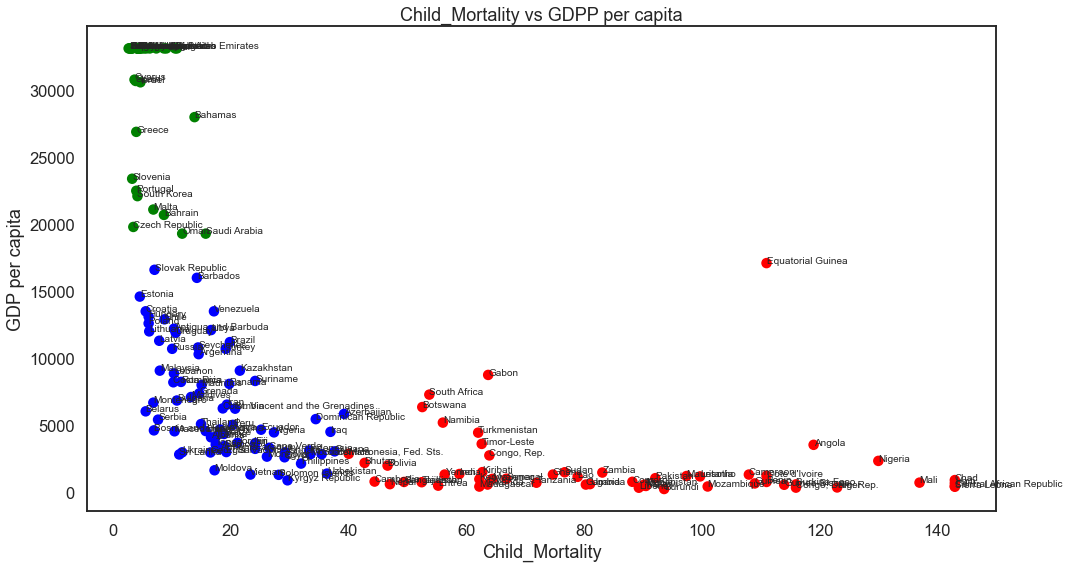

In [48]:
# Visualising the clusters formed by choosing child_mortality and GDPP(on X-Y axes)
%matplotlib inline                  
fig = plt.figure(figsize = (15,8))   # setting the figure size

# Plotting a scatter plot

plt.scatter(final['child_mort'], final['gdpp'],
            c = final.Cls_comp_3.map({0:'red',1:'blue',2:'green'}))

# labeling different cluster points with country names 

for i, txt in enumerate(final.country):
    plt.annotate(txt, (final.child_mort[i],final.gdpp[i]))

# labeling the axes and title

plt.title('Child_Mortality vs GDPP per capita')
plt.xlabel('Child_Mortality')
plt.ylabel('GDP per capita')

plt.tight_layout()  # changing the layout

plt.show()           # Showing the plot

In [49]:
len(final[final["Cls_comp_3"]==1].sort_values(by=["child_mort"],ascending=False).loc[:,["country","child_mort"]].values.tolist())
# Those country need more help according child_mort count.

73

- Here are only 73 countries which are moderate in poverty and economic

In [50]:
len(final[final["Cls_comp_3"]==2].sort_values(by=["child_mort"],ascending=False).loc[:,["country","child_mort"]].values.tolist())
# Those country need more help according child_mort count.

38

- Here are 38 country out of 167 which are economically well with no in poverty or need any help,

In [51]:
#Listing result for both clusters

print("Most poor country by Kmeans Clustering :",len(final[final["Cluster_id"]==1].loc[:,"country"].tolist())," \n \n",final[final["Cluster_id"]==1].loc[:,"country"].tolist(),"\n")
print("Most poor country by Hireachical with complete linkage Clustering :",len(final[final["Cls_comp_3"]==0].loc[:,"country"].tolist())," \n \n",final[final["Cls_comp_3"]==0].loc[:,"country"].tolist())

Most poor country by Kmeans Clustering : 33  
 
 ['Afghanistan', 'Angola', 'Benin', 'Burkina Faso', 'Burundi', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo, Dem. Rep.', "Cote d'Ivoire", 'Equatorial Guinea', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Haiti', 'Lao', 'Lesotho', 'Liberia', 'Malawi', 'Mali', 'Mauritania', 'Mozambique', 'Niger', 'Nigeria', 'Pakistan', 'Sierra Leone', 'Sudan', 'Tanzania', 'Togo', 'Uganda', 'Zambia'] 

Most poor country by Hireachical with complete linkage Clustering :, 56  
 
 ['Afghanistan', 'Angola', 'Bangladesh', 'Benin', 'Bhutan', 'Bolivia', 'Botswana', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire", 'Equatorial Guinea', 'Eritrea', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Haiti', 'India', 'Kenya', 'Kiribati', 'Lao', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Micronesia, Fed. Sts.', 'Mozambi

- **Here see no single country matches . Both have diffrent result.........**

# Conclusion:

## KMeans:
    - The country need aid are.
        - Total 33 out from category.
## Hirachical :
    - The country need aid are.
        - Total 56 out of category
- Here we known initial point for k is changed every time so it might chances of getting different result.But in hirechical clustering gives a better and accurate than K-means.when I am compare both result of cluster then hirechical cluster give some precious information
- As per buisness requirement ,find all country which need help from NGO,So That why not exclude any countries from the dataset ,so this is major drawback from model be.
- So we least all countries required help.

**So final result where country name are in direst need of aid...**


 ['Afghanistan', 'Angola', 'Bangladesh', 'Benin', 'Bhutan', 'Bolivia', 'Botswana', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire", 'Equatorial Guinea', 'Eritrea', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Haiti', 'India', 'Kenya', 'Kiribati', 'Lao', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Micronesia, Fed. Sts.', 'Mozambique', 'Myanmar', 'Namibia', 'Nepal', 'Niger', 'Nigeria', 'Pakistan', 'Rwanda', 'Senegal', 'Sierra Leone', 'South Africa', 'Sudan', 'Tajikistan', 'Tanzania', 'Timor-Leste', 'Togo', 'Turkmenistan', 'Uganda', 'Yemen', 'Zambia']